# Introduction to NumPy and Matplotlib

Last revision: Tue  22 Feb 2022 13:30:00 AEST

Author: Omar Ghattas

The goal of this lab is to give a quick overview of two of the three main packages you will need to use during COMP9417, which are:

- `NumPy`: the main Python library for working with arrays and doing math
- `matplotlib`: the main Python plotting library

The third important module for this course is:

- `scikit-learn`: a machine learning library that has already implemented a large number of the models we will discuss in the course

which is not covered here, but will be used heavily throughout the term. You should be able to pick up the `scikit-learn` basics if you have a good foundation in NumPy and work through the weekly labs for the course.

You will undoubtedly come across other modules in this course, a non-exhaustive list of possibly useful ones are: `SciPy`, `Pandas`, `Tensorflow`, `PyTorch`, `xgboost`,... However, having a good grasp of the first two listed modules is most important at this point in the course and should be sufficient (coding) background to complete most of the labs/homeworks you will be required to do throughout the term.

As always, it is your responsibilty to make sure you are comfortable with the coding requirements of the course - please take a proactive approach and reach out to your tutor or post on the course forum if you find yourself struggling at any point - sooner rather than later.

## NumPy
NumPy is one of the most important modules available for scientific computing in Python. In NumPy we work with objects called arrays. It is often useful to draw a connection between arrays and the usual objects we deal with in mathematics: A 1-dimensional array is the representation of a vector from linear algebra, a 2-dimensional array represents a matrix, and arrays with dimension greater than 3 represent tensors. It is important not to confuse the notion of dimension used in NumPy with the usual dimension in linear algebra. For example, we would usually say that the matrix:

$$
A = \begin{bmatrix} 1 & 0 & 2\\2 & 3 & 6\end{bmatrix} \in \mathbb{R}^{2 \times 3}
$$

has dimension $2 \times 3$ in a linear algebra sense. In NumPy however, we refer to this as a 2-dimensional object. To avoid confusion, NumPy arrays have a `shape`, which corresponds to the linear algebra dimension. The following code should make these concepts clear.

In [1]:
import numpy as np

a = np.array([1,2,3,4])                               # 1 dim array
b = np.zeros(4)                                       # 1 dim array of zeroes
c = np.zeros(shape=(3,3))                             # 2 dim array of zeroes with shape (3,3)
d = np.ones(shape=(2,5,4))                            # 3 dim array of ones with shape (2,5)
e = np.eye(20)                                        # 2 dim array with shape (20,20) (identity matrix)
f = np.array([[1,0,2], [2,3,6]])                      # 2 dim array with shape(2,3)
g = np.random.randint(low=-3, high=25, size=(3,7))    # 2 dim array with shape(3,7) populated with random integers
h = np.empty(shape=(10,4))                            # 2 dim array with shape(10,4) and is `empty'

To access the shape of an array, we can simply run:

In [2]:
f.shape

(2, 3)

It is often useful to change the shape of a given array, but becareful that the resulting array is what you were expecting:

In [3]:
f.reshape(1,6)                          # reshape into an array with shape (1,6)
f.reshape(6,1)                          # reshape into an array with shape (6,1)
f.reshape(2,2)                          # this is impossible

ValueError: cannot reshape array of size 6 into shape (2,2)

A very common reshaping that you will see is reshaping a one dimensional array into a two dimensional array. One dimensional arrays are treated as row vectors, and so to convert a one dimensional array into a column vector we need to specify that it has a column. Some common ways to do this:

In [4]:
a.shape                         # check out the shape of 'a'

# approach 1 for making 'a' a column vector, i.e. have shape (4,1)
a.reshape(-1,1)                 # -1 is used when the number of rows is set automatically to be whatever works

# approach 2 for marking 'a' a column vector
a[:, np.newaxis]                # indexing is explained in more detail below

array([[1],
       [2],
       [3],
       [4]])

Once an array has been created, it is important to be able to access the various elements of the array. This is called array indexing. The order of the indexes corrsponds to the shape of the array. For example, in a 2 dimensional array, the first index corresponds to the rows of the array, and the second corresponds to the columns. Let's work through some examples:

In [5]:
g[0, 3]                                 # access element in row=1, col=4
g[:, 2]                                 # access all elements in col=3, : is the 'slicing' operator
g[2, :]                                 # access all elements in row=3
g[:2, 3:6]                              # access elements in rows 1-2 and cols 4-6
g[:, ::2]                               # access every second column starting with column 1
g[:, ::3]                               # access every third column starting with column 1

array([[18, -1, 16],
       [ 7,  6, 15],
       [22, 10, 12]])

Indexing can of course be used to re-assign values. Note that these operators permanently change the original object.

In [6]:
g[0,3] = 1000                         # change element in row 1, col 4 to 1000
g[:2, 3:6] = np.zeros(shape=(2,3))    # we can change entire sub-arrays like this (careful to use exactly same shape)

Arrays have a large number of methods that implement mathematical operations, to see a full list type in `dir(g)` for example. It is important to understand the `axis` argument of many of these methods. For example, when working with a 2-dimensional array (a matrix), we might be interested in the maximum element in the entire array (default behaviour), or we might just be interested in the maximum in each row (`axis=1`), or we might be interested in the maximum in each column (`axis=0`). The `axis` argument can be implemented for any dimension when dealing with larger arrays. Consider the following examples:

In [7]:
g.max()                      # max element in g, rarely what we actually want
g.max(axis=0)                # max element in each column
g.max(axis=1)                # max element in each row

g.sum()                      # sum of elementss in g
g.sum(axis=0)                # sum of rows
g.sum(axis=1)                # sum of columns

array([72, 40, 77])

Arrays can be merged using `np.concatenate()`. We can also use `np.hstack` and `np.vstack` which implement horizontal stacking and vertical stacking respectively, and might be used instead of `np.concatenate` to make it clearer how the arrays are being merged.

In [8]:
I = np.eye(4)                                          # identity matrix 
np.concatenate((a,b, np.array([4,3,2,1])))             # concat takes a tuple of arrays
np.concatenate((I, 2*I))                               # concat works on arrays of general dimension
np.concatenate((I, 2*I), axis=1)                       # concat also takes in an axis argument, axis=0 by default
np.concatenate((I, a))                                 # will NOT work because objects have different number of dims
np.concatenate((I, a.reshape(-1,1)), axis=0)           # will NOT work because dims at axis=0 are unequal
np.concatenate((I, a.reshape(-1,1)), axis=1)           # will work because dims at axis=1 are equal

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

Arrays can also of course be split using `np.split`, some examples are:

In [9]:
np.split(g, [1,3])                 # [1,3] are the split points, axis=0 by default
np.split(g, [1,3,4], axis=1)       # split points are specific to columns now

[array([[18],
        [ 7],
        [22]]),
 array([[18, 20],
        [ 6, 12],
        [12,  6]]),
 array([[ 0],
        [ 0],
        [10]]),
 array([[ 0,  0, 16],
        [ 0,  0, 15],
        [ 4, 11, 12]])]

Arrays can be added and subtracted as long as they are the same shape

In [10]:
I + 0.5 * I
I - 0.5 * np.random.random((4,4))

array([[ 0.58682511, -0.3435787 , -0.2501603 , -0.0687302 ],
       [-0.24872992,  0.80004082, -0.29616861, -0.08991746],
       [-0.14164301, -0.39539915,  0.96249932, -0.08453328],
       [-0.09671459, -0.13602753, -0.02617208,  0.99693661]])

We can also multiply arrays, but note that this is element-wise multiplication, and not the usual vector/matrix product.

In [11]:
a * b
I * 25 * I
np.random.random((4,4)) * I

array([[0.7036303 , 0.        , 0.        , 0.        ],
       [0.        , 0.48195083, 0.        , 0.        ],
       [0.        , 0.        , 0.38393015, 0.        ],
       [0.        , 0.        , 0.        , 0.57885732]])

To take dot product between two vectors, we can use `np.dot()`, and to perform matrix multiplication, we can use the special operator `@`

In [12]:
u = np.array([1,2,3,4])
v = np.array([4,4,-2,-3])
x = np.array([-2,-2,3])
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[4,8], [9,9]])

np.dot(u,v)                                   # dot product of two vectors
u @ v                                         # this also works for dot products
np.matmul(B, A)                               # matrix multiplication: BA
B @ A                                         # this also works for matrix products
A @ x                                         # matrix by vector product (returns a row vector)
A @ x.reshape(-1,1)                           # matrix by vector product (returns a column vector)
B.T @ B                                       # take transpose of B and multiply it by B (B^T B)
B @ B @ B @ B                                 # B to the power of 4

array([[19912, 25064],
       [28197, 35577]])

The `np.linalg` sub-module also has a lot of useful linear algebra tools, for example:

In [13]:
np.linalg.matrix_power(B, 4)                  # B to the power of 4
np.linalg.matrix_rank(B)                      # compute the rank of a matrix
np.linalg.det(B)                              # find the determinant of B
np.linalg.inv(B)                              # find the inverse of B
np.linalg.eig(B)                              # eigenvalue decomposition of B

(array([-2.34590301, 15.34590301]),
 array([[-0.7834464 , -0.57625655],
        [ 0.62145936, -0.81726886]]))

An important concept in NumPy is broadcasting, which allows us to efficiently apply an operation to a large array using a smaller array. Broadcasting should be used with care and might look strange when thinking about arrays as mathematical objects. However, when done right, broadcasting can make code run very efficiently. Consider the following example in which we have a Large array, and a Small array, and wish to add the Small array to each row of Large. Here are two approaches:

In [14]:
Large = np.random.randint(-3, 4, (30, 4))
Small = np.array([1,2,3,4])

# Approach 1: Innefficient, especially for very large "Large" arrays
for i in range(Large.shape[0]):             # loop over rows of Large
    Large[i, :] = Large[i, :] + Small

# Approach 2: Broadcasting, much more efficient
Large + Small

array([[ 1,  4,  7, 11],
       [ 0,  2,  7,  6],
       [ 5,  6,  4,  5],
       [ 5,  1,  9,  8],
       [ 5,  4,  5,  6],
       [ 1,  2,  9,  6],
       [ 0,  3,  4,  8],
       [ 0,  4,  6,  5],
       [ 3,  6,  7, 11],
       [ 2,  1,  4,  6],
       [ 2,  3,  6, 10],
       [ 2,  7,  3, 11],
       [ 2,  6,  9,  6],
       [ 0,  5,  4,  5],
       [ 1,  7,  4,  7],
       [ 4,  6,  8, 11],
       [ 1,  6,  4,  8],
       [ 3,  3,  6,  9],
       [ 1,  5,  7, 11],
       [ 3,  1,  3,  7],
       [ 0,  4,  3,  5],
       [ 2,  1,  5,  6],
       [ 5,  6,  9,  5],
       [ 4,  4,  4,  7],
       [ 4,  6,  5,  7],
       [ 2,  3,  9, 11],
       [ 0,  5,  9, 10],
       [ 5,  6,  8,  9],
       [ 4,  7,  5,  7],
       [ 1,  2,  7,  5]])

We could also use broadcasting to do:

In [15]:
Large * Small               # multiply each row of Large by Small elementwise
Large - Small               # subtract each row of Large by Small
Large / Small               # divide each row of Large by Small elementwise

array([[ 0.        ,  1.        ,  1.33333333,  1.75      ],
       [-1.        ,  0.        ,  1.33333333,  0.5       ],
       [ 4.        ,  2.        ,  0.33333333,  0.25      ],
       [ 4.        , -0.5       ,  2.        ,  1.        ],
       [ 4.        ,  1.        ,  0.66666667,  0.5       ],
       [ 0.        ,  0.        ,  2.        ,  0.5       ],
       [-1.        ,  0.5       ,  0.33333333,  1.        ],
       [-1.        ,  1.        ,  1.        ,  0.25      ],
       [ 2.        ,  2.        ,  1.33333333,  1.75      ],
       [ 1.        , -0.5       ,  0.33333333,  0.5       ],
       [ 1.        ,  0.5       ,  1.        ,  1.5       ],
       [ 1.        ,  2.5       ,  0.        ,  1.75      ],
       [ 1.        ,  2.        ,  2.        ,  0.5       ],
       [-1.        ,  1.5       ,  0.33333333,  0.25      ],
       [ 0.        ,  2.5       ,  0.33333333,  0.75      ],
       [ 3.        ,  2.        ,  1.66666667,  1.75      ],
       [ 0.        ,  2.

For a full list of mathematical functions available in numPy, check out the following link: https://numpy.org/doc/stable/reference/routines.math.html

## Matplotlib
In machine learning and data science, a good visualisation can make a huge difference, and so it is very important to be able to generate good plots to illustrate your model/data clearly.

#### Example 1a: Generating a single simple plot
Let's start off with a simple plot of the sin function, which is already implemented in NumPy (`np.sin`). In order to plot this function, we need to create a grid of points (x-axis) and then evaluate the function at those points. The `np.linspace` function makes this very simple. 

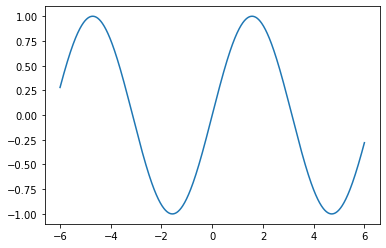

In [16]:
import matplotlib.pyplot as plt

xrange = np.linspace(-6, 6, 1000)           # creates a grid (np.array) from -6 to 6 containing 1000 points
sinx = np.sin(xrange)                       # computes sin(x) for every point in xrange
plt.plot(xrange, sinx)                      # plots xrange against sinx
plt.show()                                  # shows the plot

#### Example 1b: Generating a single plot with some extra features
Let's re-do the previous plot but also plot the cosine function on the same range. To differentiate the functions we'll use different colors and add a legend. We'll also add axis labels and a title, and we'll save the plot as a `.png` file.

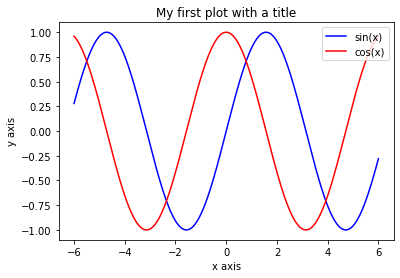

In [18]:
xrange = np.linspace(-6, 6, 1000)                       
sinx = np.sin(xrange)                                   
cosx = np.cos(xrange)                                   

plt.plot(xrange, sinx, color='blue', label='sin(x)')    # note the color and label args, label is used in the legend
plt.plot(xrange, cosx, color='red', label='cos(x)')     

plt.legend(loc='upper right')                           # creates legend in top right corner of plot
plt.xlabel("x axis")                                    # Adds x label with given text
plt.ylabel("y axis")                                    # Adds y label with given text 
plt.title("My first plot with a title")                 # Adds title label with given text
plt.savefig("myPlot.png", dpi=300)                      # dpi controls resolution, make sure to run this before .show()
plt.show()                                              

#### Example 1c: looking at plotting styles
matplotlib offers a large number of ways to customise your plotting, here are a few different ways to plot the figure in the previous example

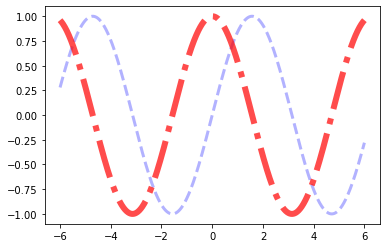

In [19]:
plt.plot(xrange, sinx, color='blue', label='sin(x)', 
         lw=3,                                           # line thickness
         linestyle='--',                                 # line style (dashed)
         alpha=0.3,                                      # control brightness of line
        )                                 
plt.plot(xrange, cosx, color='red', label='cos(x)',
        lw=6, linestyle='-.', alpha=0.7)     
plt.show()                                              

#### Example 1d: Adding layers
As an extra example, we can use the `fillbetween` function to color in the peaks of the previously plotted functions:

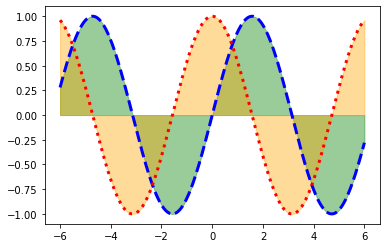

In [20]:
plt.plot(xrange, sinx, color='blue', label='sin(x)', lw=3, linestyle='--')    
plt.fill_between(xrange, y1=sinx, color='green', alpha=.4)

plt.plot(xrange, cosx, color='red', label='cos(x)', lw=3, linestyle=':')    
plt.fill_between(xrange, y1=cosx, color='orange', alpha=.4)

plt.show()                                              

#### Example 2a: Scatter Plots
We can also create scatter plots in matplotlib, here is an example of creating a 2d scatter given two numpy arrays: `xcoords, ycoords` where `xcoords` contains the x-coordinates and `ycoords` contains the y-coordinates of the points you wish to scatter. In this example, we also explore changing the `xlim` and `ylim` of the plot, which controls how much of the x and y axes we want to show in our plot.

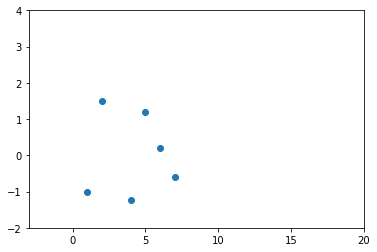

In [21]:
np.random.seed(143)                            # set a seed for reproducibility (more on this later in the lab)
xcoords = np.array([1,2,3,4,5,6,7])
ycoords = np.random.normal(loc=0, scale=1.2, size=xcoords.shape[0])
plt.scatter(xcoords, ycoords)
plt.xlim((-3,20))
plt.ylim((-2,4))
plt.show()

#### Example 2b: Custom Scatter Plots
The `scatter` function has many arguments that allow you to customize the scatter. Here is an example of a few of those, as well as an example of how to annotate a matplotlib plot with text.

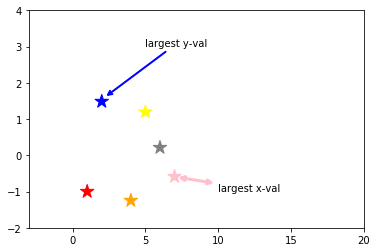

In [22]:
cols = ['red', 'blue', 'green', 'orange', 'yellow', 'gray', 'pink']
plt.scatter(xcoords, ycoords, 
            s=200,                               # control size of each point
            marker='*',                          # use stars instead of dots
            c = cols                             # supports plotting each point in different color
        )

# annotate the gray point
plt.annotate("largest y-val",                    # text to annotate with
             xy=(2.2,1.6),                         # xy coords of point to be annotated
             xytext=(5,3),                      # location of the annotating text
             
             # optional: use an arrow, can specify arrow properties in a dict:
             arrowprops={'ec':'blue',            # arrow color
                         'arrowstyle': '->',     # arrow style
                         'lw': 2,                # thickness of arrow
                        }  
        )

# annotate the pink point
plt.annotate("largest x-val",                    # text to annotate with
             xy=(7.1,-0.6),                        # xy coords of point to be annotated
             xytext=(10,-1),                     # location of the annotating text
             
             # optional: use an arrow, can specify arrow properties in a dict:
             arrowprops={'ec':'pink',           # arrow color
                         'arrowstyle': '<->',    # arrow style
                         'lw': 3,                # thickness of arrow
                        }  
        )

plt.xlim((-3,20))
plt.ylim((-2,4))
plt.show()

#### Example 2c: Scatter plots from arrays
Sometimes we have a numpy array `X` with shape `(n,2)`, where the first column corresponds to the xcoordinates, and the second column contains the y-coordinates. In this case, there is a nice way to create a scatter using the Python unpacking operator `*`. The latter approach pops up from time to time so it is good to be aware of it, but both approaches are valid of course.

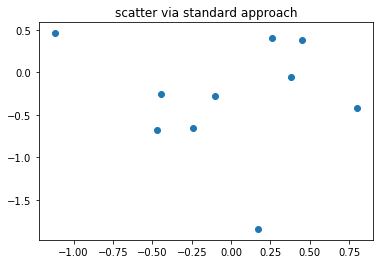

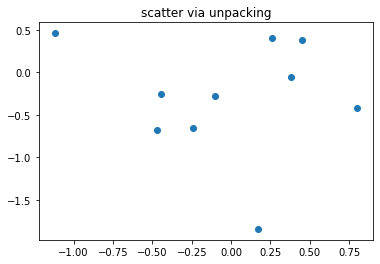

In [23]:
X = np.random.normal(0, 1, size=(10,2))

# approach 1: plot each column separately as in previous scatter example:
plt.scatter(X[:,0], X[:,1])
plt.title("scatter via standard approach")
plt.show()

# approach 2: use Python array unpacking, we first transpose the array then unpack
plt.scatter(*X.T)
plt.title("scatter via unpacking")
plt.show()

#### Example 3: more plotting and style examples
Here is a nice example showcasing the different styles of plots. Note the use of `colormap`, which is useful whenever you wish to create a list of colors automatically instead of manually as done in the scatter example. The use of `itertools.product` here is simply to create all possible combinations of the different styles and colors in `m_styles`, `l_styles`, and `mapcolors`. This example was taken from: https://stackoverflow.com/a/43416566/4294028

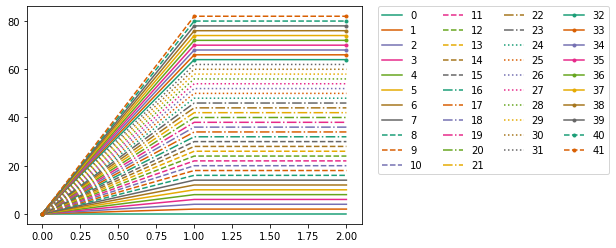

In [24]:
import itertools
import matplotlib as mpl

N = 8*4+10
l_styles = ['-','--','-.',':']                    # different line styles
m_styles = ['','.','o','^','*']                   # different marker styles 
colormap = mpl.cm.Dark2.colors                    # qualitative colormap

# loop over all possible combinations of styles+colors using itertools.product
for i, (m,l,c) in zip(range(N),itertools.product(m_styles,l_styles, colormap)):
    plt.plot([0,1,2], [0,2*i,2*i], 
             color=c, 
             linestyle=l,
             marker=m,
             label=i)

# we can create the legend outside of the plot like this:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=4);

#### Example 4: Creating a grid of plots
What if we want to create two plots side by side, instead of having both cos and sin in the same plot? An useful tool for creating grids of plots is `plt.subplots()`. The call to this function will take the form `fig, axes = plt.subplots(nrows, ncols, ...)`. `fig` is the global plot, and `axes` is a Numpy array with each element corresponding to a subplot. This is useful since we can directly refer to a particular subplot via indexing. For example, if we wish to create a grid of 6 plots, ordered in two rows, then we would set `nrows=2, ncols=3`. Then, to plot something in the subplot in the third column of the second row, we would simply refer to `axes[1,2]`.

In [ ]:
# create fig and axes objects, specifying number of subplots and the size of the figure
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,10))

axes[0,1].plot(xrange, sinx, color='blue', label='sin(x)')
axes[0,1].legend(loc='upper right')
axes[0,1].set_title("sin x")                       # slightly different title command for subplot
axes[0,1].set_xlabel("my x")                       # slightly different xlabel command for subplot
axes[0,1].set_ylabel("my y")                       # slightly different ylabel command for subplot
axes[0,1].set_xlim((-2,2))                         # slightly different change range of x's command for subplot
axes[0,1].set_ylim((-3,2))                         # slightly different change range of y's command for subplot

axes[1,2].plot(xrange, cosx, color='red', label='cos(x)')
axes[1,2].legend(loc='lower right')
axes[1,2].set_title("cos x")
axes[1,2].set_xlabel("another x")
axes[1,2].set_ylabel("another y")

axes[2,3].scatter(xcoords, ycoords)
axes[2,3].set_title("my scatter")

# we can also loop through the grids, e.g. if we want to plot lines on each plot of varying height:
for i, ax in enumerate(axes.flat):
    ax.axhline(y=0.1*i, color='orange')                     # horizontal line
    ax.axvline(x=1-0.1*i, color='purple')                   # vertical line


fig.suptitle("A global title for the entire grid")
fig.tight_layout()                                          # call to global fig object, helps format grids nicely
#plt.savefig("myFirstGrid.png", dpi=400)
plt.show()

#### Example 5a: Visualising functions in 3D
As a final example, we explore the 3D plotting functionality of matplotlib. When creating a 3D plot we need to use the `mplot3d` toolkit. Similarly to the 2D case, where we used `np.linspace` to create a grid of points at which we will evluate our function on, here we will create a 2D grid, or mesh, using the `np.meshgrid` function. In thi sexample, we are going to plot the following 2D function:

$$
f(x,y) = \cos(\sqrt{x^2 + y^2})
$$


In [ ]:
from mpl_toolkits import mplot3d

def func(x,y):
    return np.cos(np.sqrt(x**2 + y**2))

# create two one-dimensional grids using linspace
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

# combine the two one-dimensional grids into one two-dimensional grid
X, Y = np.meshgrid(x,y)

# evaluate the function at each element of the two-dimensional grid
Z = func(X, Y)

# create plot
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()



#### Example 5b: Plotting the multivariate Gaussian Density
The multivariate Gaussian, or more commonly, the multivariate Normal is one of the most important probability distributions and will come up frequently in the course. The one-dimensional density is simply:

$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{1}{2 \sigma^2} (x-\mu)^2 \right),
$$

and we refer to $\mu$ as the mean, or location parameter, and $\sigma^2$ as the variance, or noise, or scale parameter. The normal distribution is symmetric, and it is cenetered at its mean, so changing the mean shifts the location of the density. The scale, or variance, controls the spread of the distribution, so smaller values of $\sigma$ correspond to a much more concentrated (around the mean) density. The following code shows what happens to the density as we change the mean (first row of plots) and variance (second row of plots).

In [ ]:
def normal_density_1dim(x, mu, sigma):
    t1 = 1/np.sqrt(2 * np.pi * sigma**2)
    t2a = (x-mu)**2
    t2b = 1/(2 * sigma**2)
    t2 = np.exp(-1 * t2a * t2b)
    return t1 * t2


xrange = np.linspace(-6, 6, 1000)
mean_vals = [0, 1, 2, -1, -3]
sigma_vals = [0.1, 0.5, 1, 2, 4]

fig, axes = plt.subplots(2, 5, figsize=(20,10))

for j in range(5):
    p = normal_density_1dim(xrange, mean_vals[j], sigma=1)
    axes[0,j].plot(xrange, p)
    axes[0,j].axvline(mean_vals[j], color='red')
    axes[0,j].set_title(f"mean={mean_vals[j]}, sigma=1")
    axes[0,j].set_xlim((-8,8))

for j in range(5):
    p = normal_density_1dim(xrange, mu=0, sigma=sigma_vals[j])
    axes[1,j].plot(xrange, p)
    axes[1,j].set_title(f"mean=0, sigma={sigma_vals[j]}")
    axes[1,j].set_xlim((-8,8))
    
fig.tight_layout()
plt.show()

The Gaussian distribution has an extension to any dimension. For dimension $p$, the density takes the form

$$
p(x) = \frac{1}{\sqrt{ (2\pi)^p \text{det}(\Sigma)}} \exp \left (-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x-\mu) \right),
$$

note that here $x \in \mathbb{R}^p$ is a vector in $p$-dimensions, and instead of having a mean as in the 1-dimensional case, we have a mean vector $\mu \in \mathbb{R}^p$, and similarly instead of having a variance, we have a covariance matrix $\Sigma \in \mathbb{R}^{p \times p}$. 

This equation seems intimidating at first, so let's take a minute to understand what's going on. First of all, we are working with a vector in $p$-dimensions, which we can write as a collection of $p$ numbers: $x = (x_1, \dots, x_p)$. The mean in this case is also a vector $\mu \in \mathbb{R}^p$ and we can write $\mu=(\mu_1,\dots, \mu_p)$. Since $x$ is a vector, it's location must also be described by a vector.

Instead of having a single number describing the variance, we have a covariance matrix $\Sigma \in \mathbb{R}^{p \times p}$, and we can write it out as:

$$
\Sigma = 
\begin{bmatrix}
\sigma^2_1  & \sigma_{1,2} & \sigma_{1,3} & \cdots & \sigma_{1,p}\\
\sigma_{2,1} & \sigma^2_{2} & \sigma_{2,3} & \cdots & \sigma_{2,p}\\
\sigma_{3,1} & \sigma_{3,2} & \sigma^2_{3} & \cdots & \sigma_{3,p}\\
\vdots & \vdots & \vdots &\ddots  & \vdots\\
\sigma_{p,1} & \sigma_{p,2} & \sigma_{p, 3} & \cdots & \sigma^2_{p}\\
\end{bmatrix}
$$

One way to think of the multivariate Gaussian is that each individual coordinate $x_i$ is a 1 dimensional Gaussian, with mean $\mu_i$ and variance $\sigma^2_i$. The diagonals of $\Sigma$ contain the variance of each of the coordinates. What about the remaining elements of $\Sigma$? Since we have $p$-coordinates, we need a way to describe how the coordinates of $x$ co-vary with each other. This is what is captured by the off-diagonal elements: 

$$
\sigma_{ij} = \text{Cov}(x_i, x_j) = \text{Cov}(x_j, x_i) = \sigma_{ji}
$$

is the covariance between the $i$-th and $j$-th coordinates of $x$. Note that this implies that $\Sigma$ is symmetric.

In the following two sections we will explore the bivariate Gaussian (p=2) case in more depth. When $p=2$, we can write out the density as a function of the two coordinates $x=(x_1,x_2)$ explicitly, in which case $\mu=(\mu_1, \mu_2)$ and 

$$
\Sigma  = 
\begin{bmatrix}
\sigma^2_1 & \rho \sigma_1 \sigma_2\\
\rho \sigma_1 \sigma_2 & \sigma^2_2
\end{bmatrix}
$$
and we call $\rho \in (-1,1)$ the correlation coefficient.

$$
p(x,y) = \frac{1}{2 \pi \sigma_1 \sigma_2 \sqrt{1-\rho^2}}
\exp \left ( -\frac{1}{2(1 - \rho^2)}  \left [ 
    \left (\frac{x_1-\mu_1}{\sigma_1} \right)^2 + \left (\frac{x_2-\mu_2}{\sigma_2} \right)^2 - 
    2 \rho \left (\frac{x-\mu_1}{\sigma_1} \right)\left (\frac{x_2-\mu_2}{\sigma_2} \right)
\right]\right )
$$

As a short exercise, try to prove this result for yourself. In the following, we generate a 3d plot of the bivariate Normal density. Try to change the parameters and relate these changes to changes in the graph.

In [ ]:
def normal_density_2dim(x1, x2, mu1, mu2, s1, s2, rho):
    t1a = 2 * np.pi * s1 * s2
    t1b = np.sqrt(1-rho**2)
    t1 = 1/(t1a * t1b)
    
    t2a = (x1-mu1)/s1
    t2b = (x2-mu2)/s2
    t2ab = t2a * t2b
    t2 = np.exp(- (1/2*(1-rho**2)) * (t2a**2 + t2b**2 - 2*rho*t2ab))
    
    return t1*t2

# generate 3d plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x,y)

# evaluate the function at each element of the two-dimensional grid
Z = normal_density_2dim(X, Y, mu1=-1, mu2=1, s1=0.6, s2=1, rho=-.5)

# create plot
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

#### Example 5c: Contour Plots
Working with 3D plots can generally be difficult and we often study the corresponding contour plot instead. A contour plot can be thought of as the shadow or projection of a 3D function onto a 2D surface. For example, in the bivariate Gaussian case, can plot the 3D plot and its contour plot below it:

In [ ]:
# evaluate the function at each element of the two-dimensional grid
Z = normal_density_2dim(X, Y, mu1=2, mu2=0, s1=0.5, s2=2, rho=0.3)

# create plot
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.contourf(X, Y, Z, offset=-0.15, cmap=mpl.cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

The circles of the contour plot represent the different levels of the 3D function above. In this case, lighter colors are used to represent points at which the 3D function has a higher value. We can capture pretty much all aspects of 3D function simply by looking at its contour plot. Let's see some more examples of contour plots for the bivariate Normal density. Since the mean vector controls the location, and doesn't alter the shape, we will assume throughout that $\mu_1=\mu_2=0$. Further, we will fix $\sigma_2 = 1$ and vary $\sigma_1$.

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))

rhos = [-0.8, 0, 0.8]
sigmas = [0.5, 1, 2]

for i in range(3):
    for j in range(3):
        s = sigmas[j]
        r = rhos[i]
        Z = normal_density_2dim(X, Y, mu1=0, mu2=0, s1=s, s2=1, rho=r)
        axes[i,j].contourf(X,Y,Z, cmap=mpl.cm.viridis)
        axes[i,j].set_title(f"$\sigma_1 = {s}$, $\\rho = {r}$")
        
plt.tight_layout()
plt.show()

It is important to be able to interpret such plots correctly, make sure you take the time to do so. Note that in all plots, the peak of the plot is at $(0,0)$, since this is the mean. As we increase $\sigma_1$, we see that the plot spreads out in the $x_1$ direction. This is intuitive since $\sigma_1$ controls the noise in the $x_1$ direction. If we were to change $\sigma_2$, we would see a similar scaling in the $x_2$ direction. Finally, note that when the correlation is non-zero, then we get an elongation of the density along one of the two main diagonals. Positive correlation results in elongation along the $x_1=x_2$ diagonal, and negative correlation along the $x_1= -x_1$ diagonal.

The following is a good resource to learn more about the multivariate normal: https://datasciencegenie.com/3d-contour-plots-of-bivariate-normal-distribution/. The wikipedia page on this topic is also an excellent resource: https://en.wikipedia.org/wiki/Multivariate_normal_distribution.

#### Example 5d: Sampling from the Gaussian Distribution
In the previous examples, we wrote the normal density function from scratch. Whilst this is good for practice, we would generally use existing implementations in future, for example using the `scipy.stats` module. These give us access to much more than just the density, for example, it gives us the ability to sample from the Gaussian distribution.

** What is Sampling? ** Before we discuss how to go about generating samples from a distribution using Python, we should clarify what it means to 'generate' or 'draw' a sample from a distribution. Let's start off with the simplest possible case. Say you have a two sided coin, and we let $X$ denote the outcome of tossing the coin. $X$ is known as a random variable, since its value is random (it can either be heads (labeled as 1) or tails (labeled as 0). The probability of seeing a head is $p = P(X=1)$, and therefore, the probability of seeing tails is $1-p$. If we were to toss the coin 6 times, then we would observe a sequence of samples, for example $X_1 = 0, X_2=0, X_3 = 1, X_4=0, X_5,=1, X_6=1$. Note that for a high value of $p$, say $p=0.9$, then we would expect most of the samples to be 1. This process is called sampling, and we can mimic the idea of tossing the coin a number of times using NumPy. In particular, we say the radom variable $X$ follows a Bernoulli distribution with parameter $p$, and write 

$$
X \sim \text{Bernoulli}(p),
$$

and has corresponding probability mass function

$$
P(X=x) = p^x (1-p)^{1-x}, \qquad x \in \{ 0,1\}, p\in [0,1],
$$

which tells us the probability of seeing the random variable $X$ take on a specific value $x$, and in this case $x$ can be either 0 or 1. We can generate samples from this distribution by either using the `np.random.binomial()` function or the `scipy.stats.bernoulli` object:

In [ ]:
import scipy
from scipy.stats import bernoulli

# directly via numpy
np.random.binomial(n=1, p=0.8, size=10)

# using scipy
prob = scipy.stats.bernoulli(p=0.8)
prob.rvs(10)

The coin toss example is simple because we were dealing with a discrete distribution and the random variable could take on only a finite number of outcomes (specifically, two). The univariate Gaussian distribution is continuous, and so samples from it will take on values on the real line, which we denote by $\mathbb{R}$. Instead of a probability mass function (pmf), we now talk about a probability density function (pdf):

$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left ( -\frac{1}{2 \sigma^2} (x-\mu)^2\right ), \qquad x \in \mathbb{R}.
$$

Recall that $P(X=x)=0$ for any continuous random variable $X$, which is why we no longer talk about mass functions. The density function can be thought of as telling us how likely it is to see a random variable take on a specific value. For the Gaussian case, we know that the density is most peaked around its mean, so we expect to see random variables close to their mean. We can generate samples from this distribution by either using the `np.random.normal()` function or the `scipy.stats.norm` object. The `scipy` implementations offer a bit more than what you get in `Numpy` since we are also able to access implentations of the density and other relevant characteristics. In the following we'll plot the density again uscing `scipy` this time.

In [ ]:
from scipy.stats import norm

normal_dist = norm(loc=1, scale=1.)
samples = normal_dist.rvs(size=20)

# plotting samples and density
xrange = np.linspace(-4,6,1000)
dens = normal_dist.pdf(xrange)

plt.scatter(samples, np.zeros_like(samples), marker='*', color='orange')
plt.plot(xrange, dens)
plt.show()

Both `NumPy` and `SciPy` have implementations for other distributions, including the multivariate Gaussian. One final note here is that each time we run the abov ecode, the result will be different. This is to be expected since we are generating random numbers, but is not ideal if our goal is to show a specific phenomenon or have our code be exactly reproducible by someone else. This brings us to the idea of setting a random seed, so that each time we use the same seed, we will see exactly the same random numbers generated. The above code would then be re-written:

In [ ]:
np.random.seed(123)          # this can be any number, using the same number will yield exactly reproducible results

normal_dist = norm(loc=1, scale=1.)
samples = normal_dist.rvs(size=20)
dens = normal_dist.pdf(xrange)

plt.scatter(samples, np.zeros_like(samples), marker='*', color='orange')
plt.plot(xrange, dens)
plt.show()